In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
# Get S&P 500 data
stock_data = yf.Ticker("^GSPC")
df_history = stock_data.history(start="2019-01-01", end="2023-01-01")

In [4]:
df_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0.0,0.0
2019-01-03 00:00:00-05:00,2491.919922,2493.139893,2443.959961,2447.889893,3858830000,0.0,0.0
2019-01-04 00:00:00-05:00,2474.330078,2538.070068,2474.330078,2531.939941,4234140000,0.0,0.0
2019-01-07 00:00:00-05:00,2535.610107,2566.159912,2524.560059,2549.689941,4133120000,0.0,0.0
2019-01-08 00:00:00-05:00,2568.110107,2579.820068,2547.560059,2574.409912,4120060000,0.0,0.0


In [9]:
# Look at summary stats  
print(df_history.describe())

              Open         High          Low        Close        Volume  \
count  1008.000000  1008.000000  1008.000000  1008.000000  1.008000e+03   
mean   3624.417895  3647.218679  3599.614941     8.179940  4.379268e+09   
std     634.838500   637.420319   631.716356     0.178079  1.109899e+09   
min    2290.709961  2300.729980  2191.860107     7.713070  1.296530e+09   
25%    3004.890076  3016.355103  2991.074951     8.008110  3.674172e+09   
50%    3685.359985  3707.224976  3646.645020     8.210176  4.133645e+09   
75%    4182.142578  4202.632446  4158.637573     8.338167  4.817915e+09   
max    4804.509766  4818.620117  4780.040039     8.475654  9.976520e+09   

       Dividends  Stock Splits  
count     1008.0        1008.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0  


In [6]:
df_history.shape

(1008, 7)

<Axes: ylabel='Frequency'>

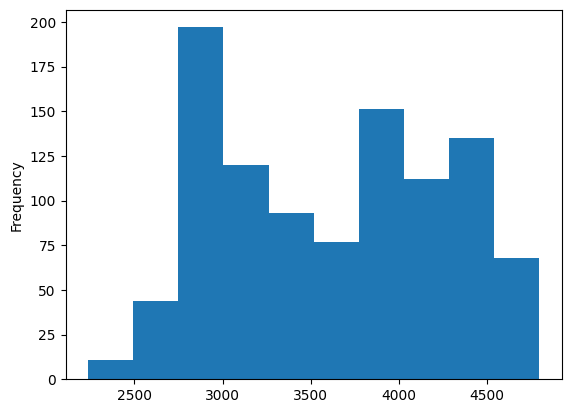

In [7]:
df_history["Close"].plot.hist()


<Axes: ylabel='Frequency'>

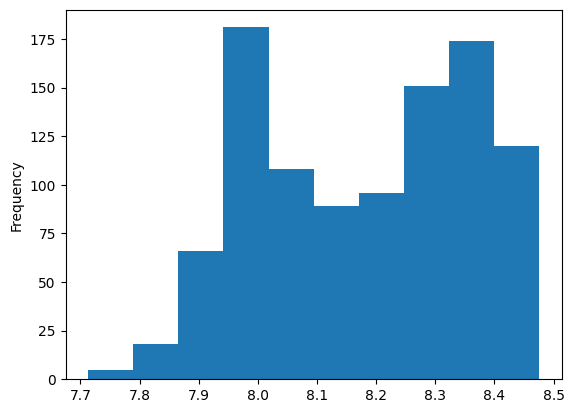

In [8]:
df_history["Close"]= np.log(df_history['Close'])
df_history["Close"].plot.hist()

In [11]:
# Calculate daily returns
df_history['Returns'] = df_history['Close'].pct_change()

In [12]:
# Annualized volatility  
vol = df_history['Returns'].std() * np.sqrt(252)
print(f"Annual volatility: {vol:.2%}")

Annual volatility: 2.86%


<Axes: ylabel='Frequency'>

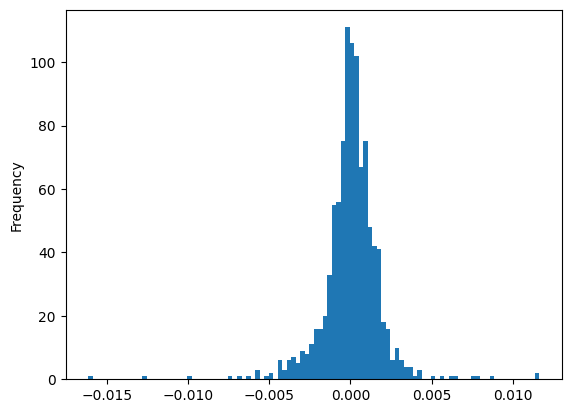

In [13]:
# Plot histogram of returns
df_history['Returns'].plot.hist(bins=100)

In [14]:
# Get stats on returns
print(df_history['Returns'].describe())


count    1007.000000
mean        0.000054
std         0.001799
min        -0.016148
25%        -0.000659
50%         0.000118
75%         0.000897
max         0.011627
Name: Returns, dtype: float64


In [15]:
# Check for normality
from scipy.stats import normaltest
print(normaltest(df_history['Returns']))

NormaltestResult(statistic=nan, pvalue=nan)


In [17]:
# Run regression on returns
X = df_history['Close']
y = df_history['Returns']


In [18]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Returns   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Thu, 14 Sep 2023   Prob (F-statistic):                         nan
Time:                        14:29:56   Log-Likelihood:                             nan
No. Observations:                1008   AIC:                                        nan
Df Residuals:                    1007   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='Date'>

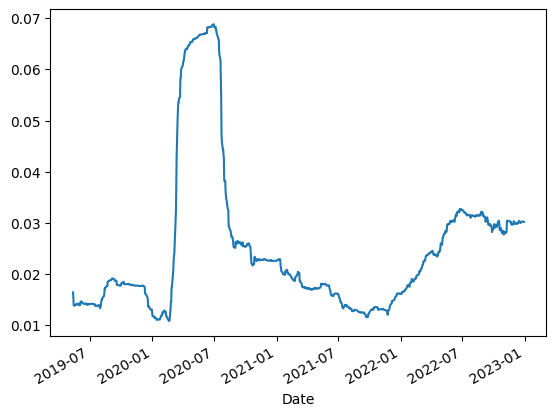

In [19]:
# Plot rolling volatility
roll_vol = df_history['Returns'].rolling(90).std() * np.sqrt(252)
roll_vol.plot()

In [22]:
# Risk analysis

# Annualized volatility
vol = df_history['Returns'].std() * np.sqrt(252) 
print(vol)

0.028562270195621985


In [23]:
# Value at risk
var_95 = df_history['Returns'].quantile(0.05)
print(f"95% VAR: {var_95:.3%}")

95% VAR: -0.260%


In [24]:
# Expected shortfall 
es_95 = df_history['Returns'][df_history['Returns']<var_95].mean()
print(f"95% ES: {es_95:.3%}")

95% ES: -0.449%


In [25]:
# Correlations

# Correlation matrix
corr = df_history.corr()
print(corr)

                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999368  0.999035  0.995420  0.031949        NaN   
High          0.999368  1.000000  0.998699  0.996065  0.043353        NaN   
Low           0.999035  0.998699  1.000000  0.996470  0.012239        NaN   
Close         0.995420  0.996065  0.996470  1.000000  0.023539        NaN   
Volume        0.031949  0.043353  0.012239  0.023539  1.000000        NaN   
Dividends          NaN       NaN       NaN       NaN       NaN        NaN   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   
Returns      -0.036202 -0.015592 -0.007591  0.016885 -0.087433        NaN   

              Stock Splits   Returns  
Open                   NaN -0.036202  
High                   NaN -0.015592  
Low                    NaN -0.007591  
Close                  NaN  0.016885  
Volume                 NaN -0.087433  
Dividends              NaN       NaN  
Stock Splits           NaN       

c:\ProgramData\anaconda3\envs\ml\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\ProgramData\anaconda3\envs\ml\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\ProgramData\anaconda3\envs\ml\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>,
        <Axes: xlabel='Dividends', ylabel='Open'>,
        <Axes: xlabel='Stock Splits', ylabel='Open'>,
        <Axes: xlabel='Returns', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>,
        <Axes: xlabel='Dividends', ylabel='High'>,
        <Axes: xlabel='Stock Splits', ylabel='High'>,
        <Axes: xlabel='Returns', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>,

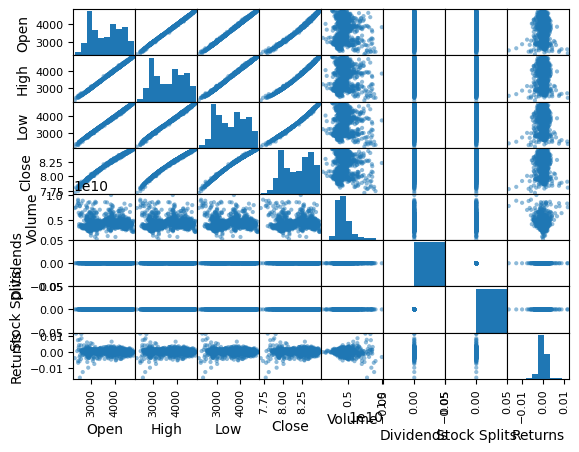

In [26]:
# Plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_history)


In [29]:
# Monte Carlo simulation
mu = df_history['Returns'].mean()
sigma = df_history['Returns'].std()
returns = np.random.normal(mu, sigma, 10_000)
print(returns.mean(), returns.std())

9.822173683382916e-05 0.0018269117738603164


In [30]:
# Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X = df_history[['Open','High','Low','Volume']] 
y = df_history['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9927978076814453
0.0002297790573754443


In [34]:
# Hypothesis Testing

from scipy.stats import normaltest

print(normaltest(df_history['Returns']))

mu = df_history['Returns'].mean()
print(mu)

NormaltestResult(statistic=nan, pvalue=nan)
5.4127529368506636e-05


In [35]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(df_history['Returns'], 0)
print(pval)

if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

nan
Fail to reject null hypothesis


In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate sample timeseries data
n_steps = 50
series = np.sin(np.arange(n_steps)) + np.random.randn(n_steps) * 0.1
X, y = series[:-1], series[1:]

In [40]:
# Reshape into n_samples x timesteps x features 
n_features = 1
train_X = X.reshape((len(X), 1, n_features))
train_y = y.reshape((len(y), 1, n_features))


In [43]:
# Define LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))  
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [45]:
model.fit(train_X, train_y, epochs=200)

Epoch 1/200


2/2 [==============================] - 0s 9ms/step - loss: 0.3567
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3568
Epoch 3/200
2/2 [==============================] - 0s 13ms/step - loss: 0.3569
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.3567
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.3567
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.3568
Epoch 7/200
2/2 [==============================] - 0s 17ms/step - loss: 0.3568
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 0.3568
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 0.3568
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3567
Epoch 11/200
2/2 [==============================] - 0s 6ms/step - loss: 0.3568
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3567
Epoch 13/200
2/2 [==============================] - 0s 9ms/step - los

In [46]:
x_input = np.array([X[-1]])
n_steps = 1
x_input = x_input.reshape((1, n_steps, n_features)) 

In [48]:
yhat = model.predict(x_input) 
print(yhat[0,0])

1/1 [==============================] - 0s 95ms/step
-0.39807627
